In [6]:
pip install earthpy rioxarray geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

In [8]:
data = et.data.get_data('cold-springs-fire')

Extracted output to /home/codespace/earth-analytics/data/cold-springs-fire/.


In [9]:
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [10]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

In [11]:
naip_csf_path = os.path.join("cold-springs-fire", 
                             "naip", 
                             "m_3910505_nw_13_1_20150919", 
                             "crop", 
                             "m_3910505_nw_13_1_20150919_crop.tif")

naip_csf = rxr.open_rasterio(naip_csf_path, masked=True)
naip_csf

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 162MB
[40478496 values with dtype=float32]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0

In [12]:
naip_csf.shape

(4, 2312, 4377)

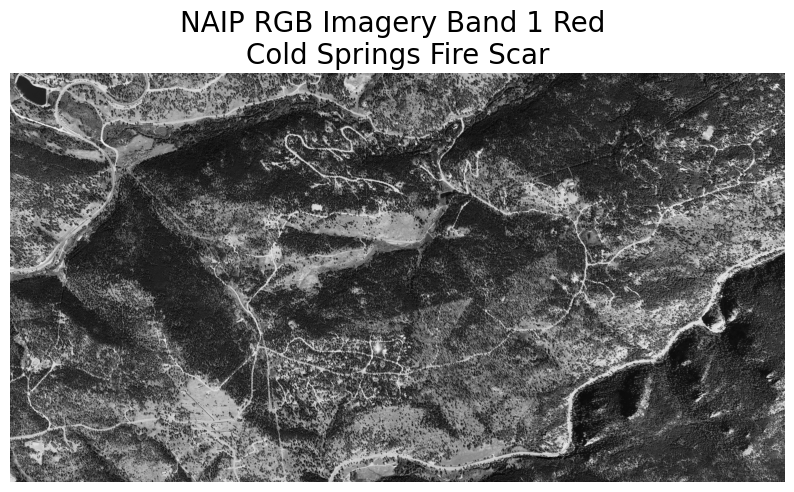

In [13]:
fig, ax = plt.subplots()

ax.imshow(naip_csf[0], 
          cmap="Greys_r")
ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")
ax.set_axis_off()
plt.show()

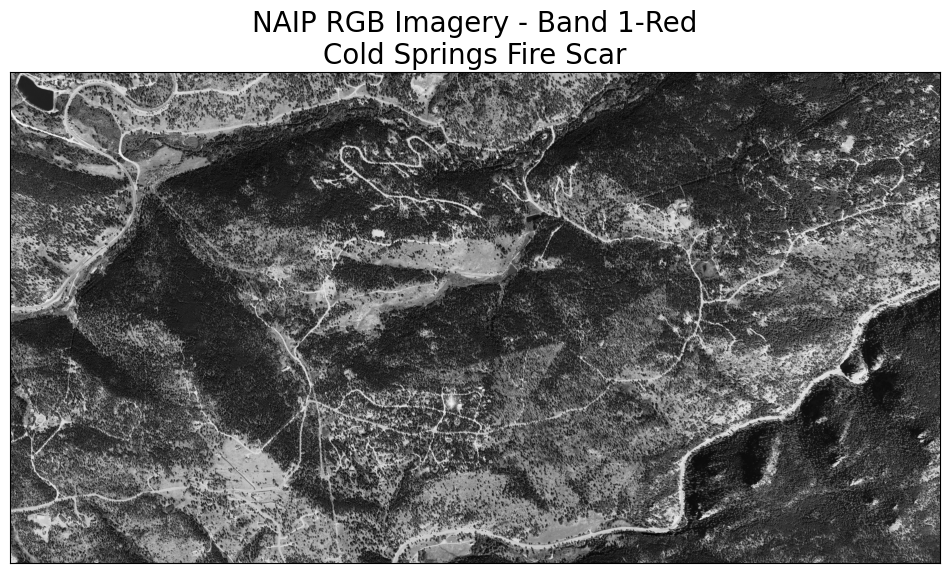

In [14]:
ep.plot_bands(naip_csf[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

In [15]:
naip_csf.band

<xarray.DataArray 'band' (band: 4)> Size: 32B
array([1, 2, 3, 4])
Coordinates:
  * band         (band) int64 32B 1 2 3 4
    spatial_ref  int64 8B 0

In [16]:
print(naip_csf.min())
print(naip_csf.max())

<xarray.DataArray ()> Size: 4B
array(17., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
<xarray.DataArray ()> Size: 4B
array(242., dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0


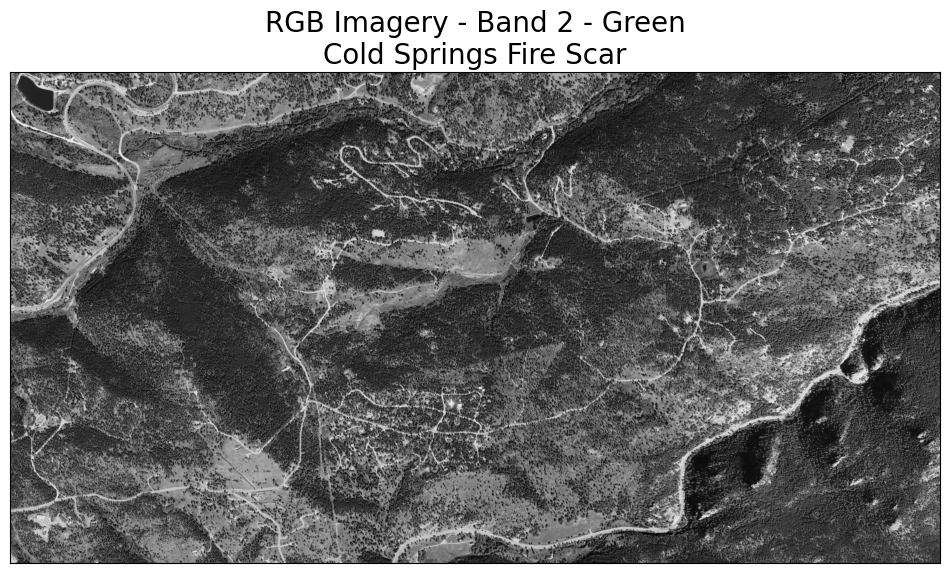

In [17]:
ep.plot_bands(naip_csf[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

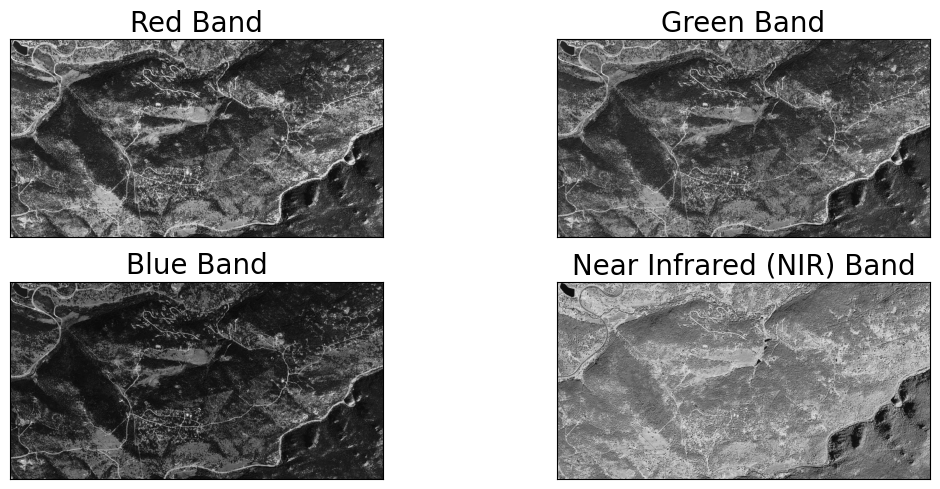

In [18]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

ep.plot_bands(naip_csf, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

In [ ]:
ep.plot_rgb(naip_csf.values,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()